In [489]:
pip install statsmodels


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [490]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.formula.api as smf
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings('ignore')

#### Airline Data - Model based Algorithms

In [491]:
air = pd.read_csv('Airlines+Data.csv')
air

,Month,Passengers
0,Jan-95,112
1,Feb-95,118
2,Mar-95,132
3,Apr-95,129
4,May-95,121
...,...,...
91,Aug-02,405
92,Sep-02,355
93,Oct-02,306
94,Nov-02,271


<AxesSubplot: >

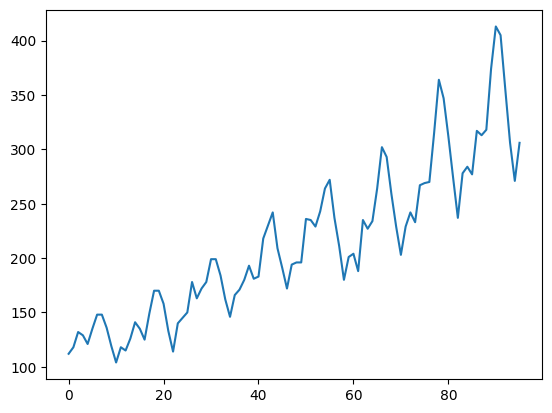

In [492]:
air.Passengers.plot()

<AxesSubplot: ylabel='Density'>

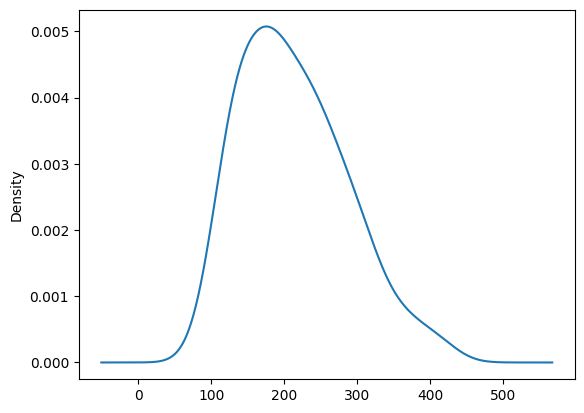

In [493]:
air.Passengers.plot(kind='kde')

In [494]:
#Creating column t in chronological order and extracting month, year, Date from the Month column

air['t'] = range(1,len(air)+1)
air['t_squared'] = air['t']*air['t']
air['log_passengers'] = np.log(air['Passengers'])
air['Date'] = pd.to_datetime(air['Month'],format='%b-%y')
air['month'] = air.Date.dt.strftime('%b')
air['year'] = air.Date.dt.strftime('%y')
air

# air['day'] = air.Date.dt.strftime('%d')   #Day extraction
# air['weekday'] = air.Date.dt.strftime('%A')    #weekday extraction

,Month,Passengers,t,t_squared,log_passengers,Date,month,year
0,Jan-95,112,1,1,4.718499,1995-01-01,Jan,95
1,Feb-95,118,2,4,4.770685,1995-02-01,Feb,95
2,Mar-95,132,3,9,4.882802,1995-03-01,Mar,95
3,Apr-95,129,4,16,4.859812,1995-04-01,Apr,95
4,May-95,121,5,25,4.795791,1995-05-01,May,95
...,...,...,...,...,...,...,...,...
91,Aug-02,405,92,8464,6.003887,2002-08-01,Aug,02
92,Sep-02,355,93,8649,5.872118,2002-09-01,Sep,02
93,Oct-02,306,94,8836,5.723585,2002-10-01,Oct,02
94,Nov-02,271,95,9025,5.602119,2002-11-01,Nov,02


In [495]:
# Dummy variable creation of month column
dummy = pd.get_dummies(air['month'])
air = pd.concat([air,dummy],axis=1)
# air.set_index('Month',inplace=True)
air

,Month,Passengers,t,t_squared,log_passengers,Date,month,year,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,Jan-95,112,1,1,4.718499,1995-01-01,Jan,95,0,0,0,0,1,0,0,0,0,0,0,0
1,Feb-95,118,2,4,4.770685,1995-02-01,Feb,95,0,0,0,1,0,0,0,0,0,0,0,0
2,Mar-95,132,3,9,4.882802,1995-03-01,Mar,95,0,0,0,0,0,0,0,1,0,0,0,0
3,Apr-95,129,4,16,4.859812,1995-04-01,Apr,95,1,0,0,0,0,0,0,0,0,0,0,0
4,May-95,121,5,25,4.795791,1995-05-01,May,95,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,Aug-02,405,92,8464,6.003887,2002-08-01,Aug,02,0,1,0,0,0,0,0,0,0,0,0,0
92,Sep-02,355,93,8649,5.872118,2002-09-01,Sep,02,0,0,0,0,0,0,0,0,0,0,0,1
93,Oct-02,306,94,8836,5.723585,2002-10-01,Oct,02,0,0,0,0,0,0,0,0,0,0,1,0
94,Nov-02,271,95,9025,5.602119,2002-11-01,Nov,02,0,0,0,0,0,0,0,0,0,1,0,0


<AxesSubplot: xlabel='month', ylabel='Passengers'>

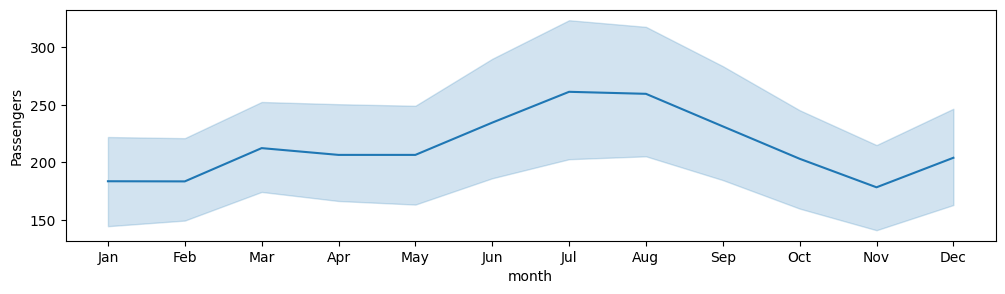

In [496]:
#Month wise passengers
plt.figure(figsize=(12,3))
sns.lineplot(x='month',y='Passengers',data=air)

<AxesSubplot: xlabel='year', ylabel='Passengers'>

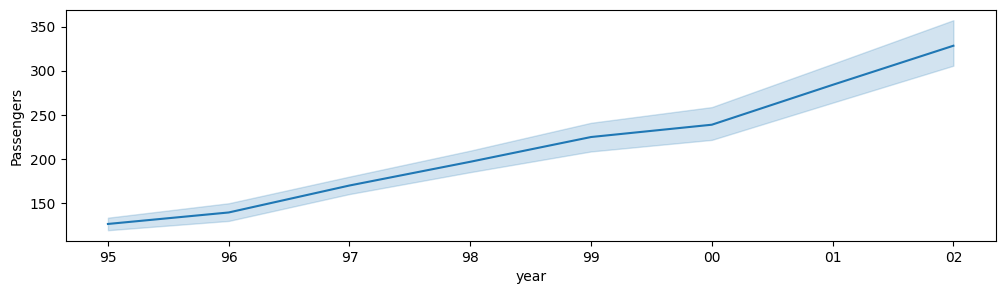

In [497]:
#year wise passengers
plt.figure(figsize=(12,3))
sns.lineplot(x='year',y='Passengers',data=air)

<AxesSubplot: xlabel='month', ylabel='year'>

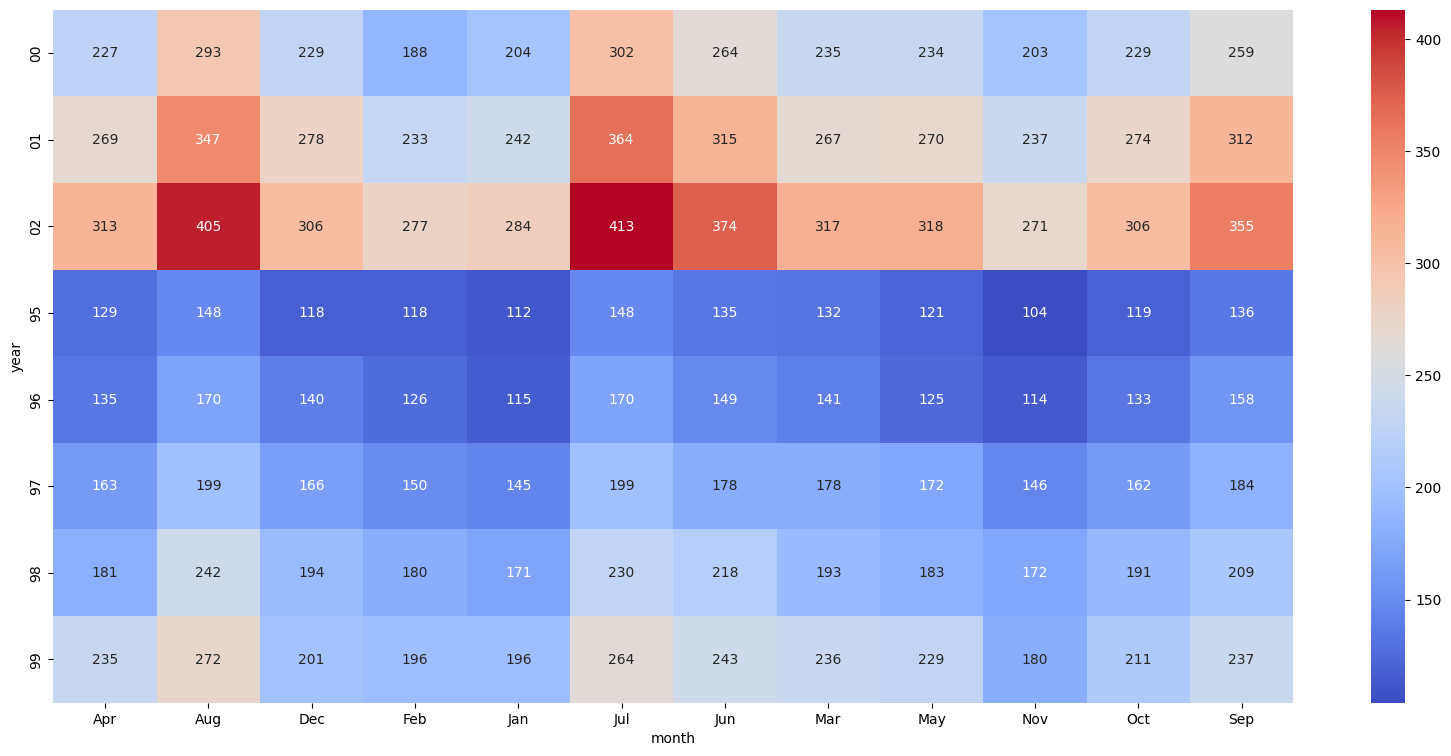

In [498]:
plt.figure(figsize=(20,9))
heatmap_y_month = pd.pivot_table(data=air,values='Passengers',index='year',columns='month',aggfunc='mean',fill_value=0)
sns.heatmap(heatmap_y_month,annot=True,fmt='g',cmap='coolwarm')

        The relationship between year and month which showing the color dark red shows high Passenger in that month of the year, in our data in the year 2002 the month July and August shows higher passenger.
        Which can also be shown in the below boxplot

<AxesSubplot: xlabel='year', ylabel='Passengers'>

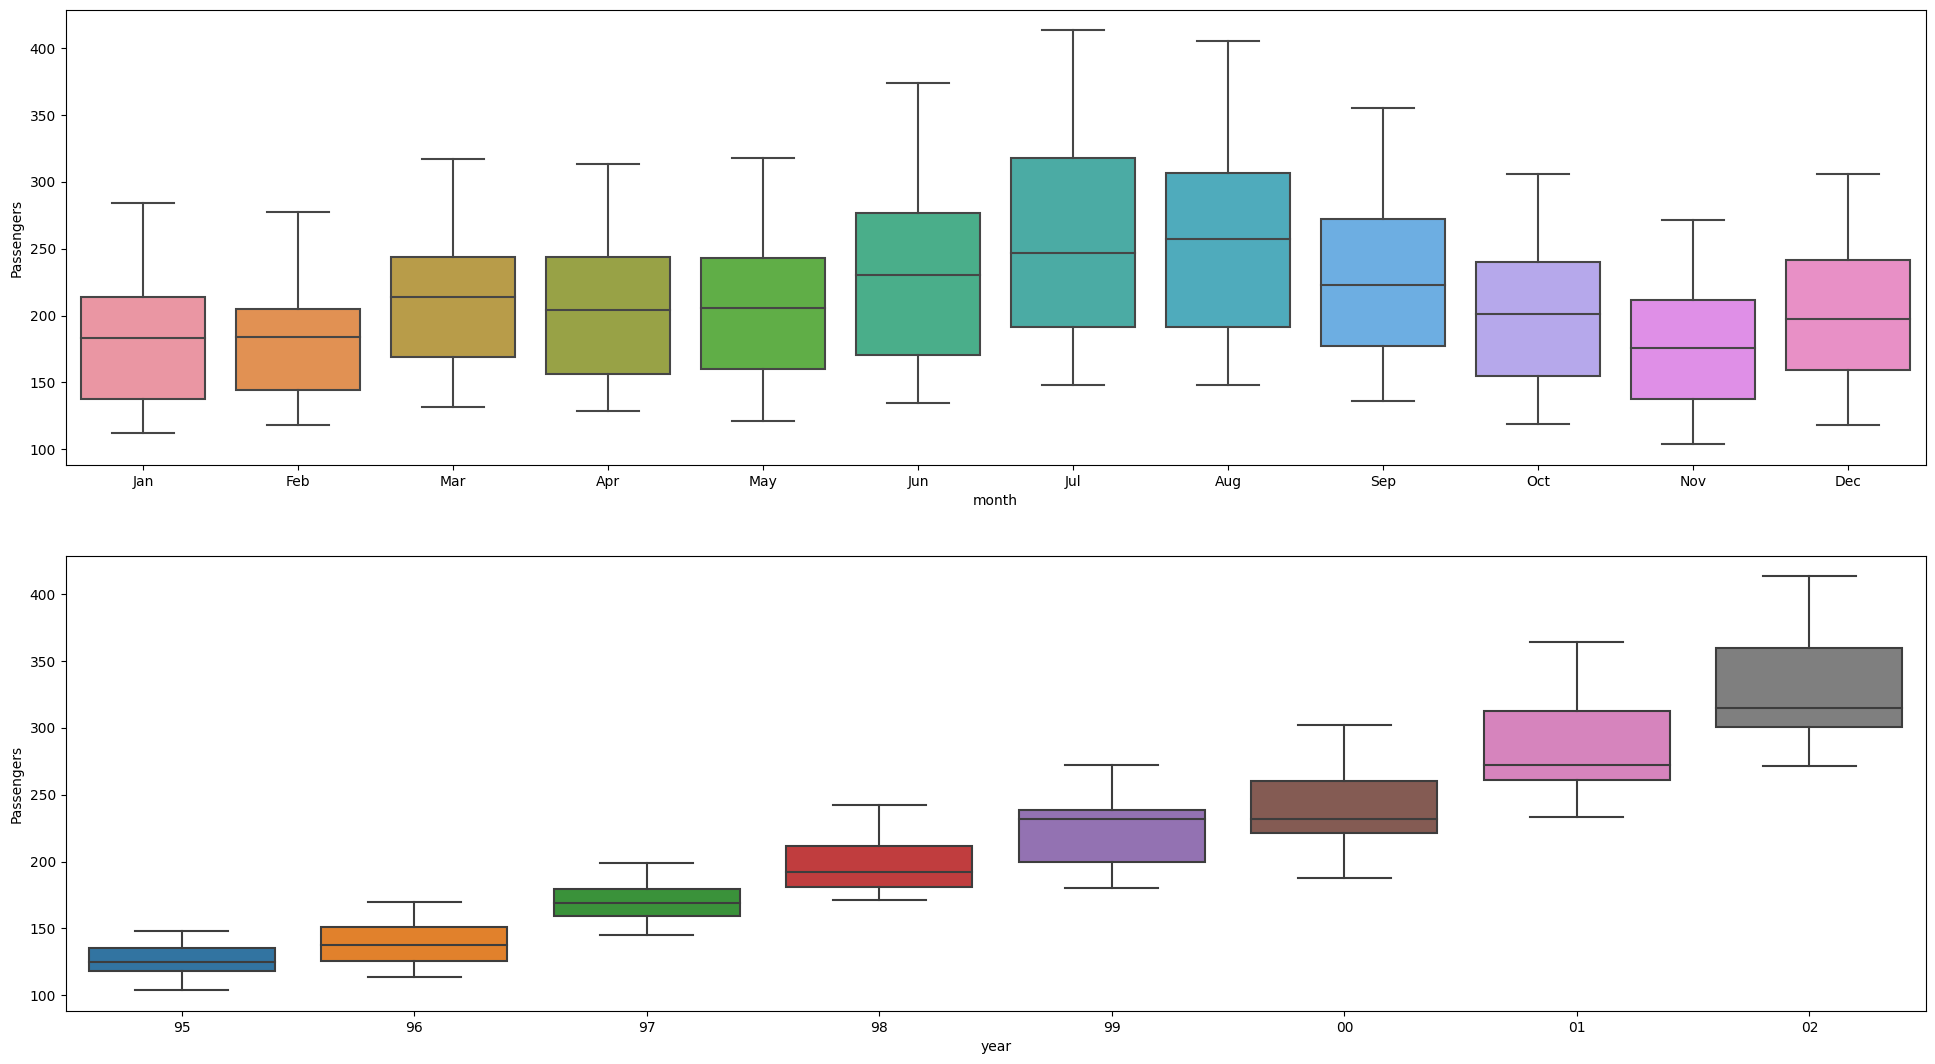

In [499]:
plt.figure(figsize=(24,13))
plt.subplot(211)
sns.boxplot(x='month',y='Passengers',data=air)
plt.subplot(212)
sns.boxplot(x='year',y='Passengers',data=air)

##### Splitting data

In [500]:
train_size = int(len(air)*0.8)
train = air.iloc[:train_size]
test = air.iloc[train_size:]

In [501]:
train_size, train.shape, test.shape

(76, (76, 20), (20, 20))

In [502]:
train

,Month,Passengers,t,t_squared,log_passengers,Date,month,year,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,Jan-95,112,1,1,4.718499,1995-01-01,Jan,95,0,0,0,0,1,0,0,0,0,0,0,0
1,Feb-95,118,2,4,4.770685,1995-02-01,Feb,95,0,0,0,1,0,0,0,0,0,0,0,0
2,Mar-95,132,3,9,4.882802,1995-03-01,Mar,95,0,0,0,0,0,0,0,1,0,0,0,0
3,Apr-95,129,4,16,4.859812,1995-04-01,Apr,95,1,0,0,0,0,0,0,0,0,0,0,0
4,May-95,121,5,25,4.795791,1995-05-01,May,95,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,Dec-00,229,72,5184,5.433722,2000-12-01,Dec,00,0,0,1,0,0,0,0,0,0,0,0,0
72,Jan-01,242,73,5329,5.488938,2001-01-01,Jan,01,0,0,0,0,1,0,0,0,0,0,0,0
73,Feb-01,233,74,5476,5.451038,2001-02-01,Feb,01,0,0,0,1,0,0,0,0,0,0,0,0
74,Mar-01,267,75,5625,5.587249,2001-03-01,Mar,01,0,0,0,0,0,0,0,1,0,0,0,0


In [503]:
test

,Month,Passengers,t,t_squared,log_passengers,Date,month,year,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
76,May-01,270,77,5929,5.598422,2001-05-01,May,01,0,0,0,0,0,0,0,0,1,0,0,0
77,Jun-01,315,78,6084,5.752573,2001-06-01,Jun,01,0,0,0,0,0,0,1,0,0,0,0,0
78,Jul-01,364,79,6241,5.897154,2001-07-01,Jul,01,0,0,0,0,0,1,0,0,0,0,0,0
79,Aug-01,347,80,6400,5.849325,2001-08-01,Aug,01,0,1,0,0,0,0,0,0,0,0,0,0
80,Sep-01,312,81,6561,5.743003,2001-09-01,Sep,01,0,0,0,0,0,0,0,0,0,0,0,1
81,Oct-01,274,82,6724,5.613128,2001-10-01,Oct,01,0,0,0,0,0,0,0,0,0,0,1,0
82,Nov-01,237,83,6889,5.468060,2001-11-01,Nov,01,0,0,0,0,0,0,0,0,0,1,0,0
83,Dec-01,278,84,7056,5.627621,2001-12-01,Dec,01,0,0,1,0,0,0,0,0,0,0,0,0
84,Jan-02,284,85,7225,5.648974,2002-01-01,Jan,02,0,0,0,0,1,0,0,0,0,0,0,0
85,Feb-02,277,86,7396,5.624018,2002-02-01,Feb,02,0,0,0,1,0,0,0,0,0,0,0,0


##### Building different models and comparing rmse

###### Linear Model

In [504]:
linear_model = smf.ols('Passengers~t',data=train).fit()
pred_lin = pd.Series(linear_model.predict(test['t']))
rmse_lin = np.sqrt(mean_squared_error(test['Passengers'],pred_lin))
rmse_lin

57.00014788256584

###### Exponential Model

In [505]:
exp_model = smf.ols('log_passengers~t',data=train).fit()
pred_exp = pd.Series(exp_model.predict(test['t']))
rmse_exp = np.sqrt(mean_squared_error(test['Passengers'],pred_exp))
rmse_exp

314.4271317504474

###### Quadratic

In [506]:
quad_model = smf.ols('Passengers~t+t_squared',data=train).fit()
pred_quad = pd.Series(quad_model.predict(test[['t','t_squared']]))
rmse_quad = np.sqrt(mean_squared_error(test['Passengers'],pred_quad))
rmse_quad

58.49427463947253

In [507]:
train.head(2)

,Month,Passengers,t,t_squared,log_passengers,Date,month,year,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,Jan-95,112,1,1,4.718499,1995-01-01,Jan,95,0,0,0,0,1,0,0,0,0,0,0,0
1,Feb-95,118,2,4,4.770685,1995-02-01,Feb,95,0,0,0,1,0,0,0,0,0,0,0,0


###### Additive Seasonality

In [508]:
add_sea_model = smf.ols('Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=train).fit()
pred_add_sea = pd.Series(add_sea_model.predict(test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']]))
rmse_add_sea = np.sqrt(mean_squared_error(test['Passengers'],pred_add_sea))
rmse_add_sea

132.25413439949477

###### Additive Quadratic Seasonality

In [509]:
add_quad_sea_model = smf.ols('Passengers~t+t_squared+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=train).fit()
pred_add_quad_sea = pd.Series(add_quad_sea_model.predict(test)) 
#test=[['t','t_squared','Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']], 
# either we can write all independent variables passed to train/ fit the model or simply pass test variable, it will pick automatically  
rmse_add_quad_sea = np.sqrt(mean_squared_error(test['Passengers'],pred_add_quad_sea))
rmse_add_quad_sea

39.75976633806374

###### Multiplicative Seasonality

In [510]:
mul_sea_model = smf.ols('log_passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=train).fit()
pred_mul_sea = pd.Series(mul_sea_model.predict(test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']]))
rmse_mul_sea = np.sqrt(mean_squared_error(test['Passengers'],pred_mul_sea))
rmse_mul_sea

314.92426103796834

###### Multiplicative Additive Seasonality

In [511]:
mul_add_sea_model = smf.ols('log_passengers~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=train).fit()
pred_mul_add_sea = pd.Series(mul_sea_model.predict(test))         #test=[['t','Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']]
rmse_mul_add_sea = np.sqrt(mean_squared_error(test['Passengers'],pred_mul_add_sea))
rmse_mul_add_sea

314.92426103796834

In [512]:
error_data = {'Model':pd.Series(['rmse_lin','rmse_exp','rmse_quad','rmse_add_sea','rmse_add_quad_sea','rmse_mul_sea','rmse_mul_add_sea']),'rmse_values':pd.Series([rmse_lin,rmse_exp,rmse_quad,rmse_add_sea,rmse_add_quad_sea,rmse_mul_sea,rmse_mul_add_sea])}
rmse_model_df = pd.DataFrame(error_data)
rmse_model_df.sort_values(['rmse_values'])

,Model,rmse_values
4,rmse_add_quad_sea,39.759766
0,rmse_lin,57.000148
2,rmse_quad,58.494275
3,rmse_add_sea,132.254134
1,rmse_exp,314.427132
5,rmse_mul_sea,314.924261
6,rmse_mul_add_sea,314.924261


In [513]:
# Building model om entire data
model_full = smf.ols('Passengers~t+t_squared+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=air).fit()
model_full

In [514]:
val_df = pd.read_csv('ValidateAirline.csv')
val_df.head()

,Month,t,t_squared,Date,month,year,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,Jan-03,97,9409,2003-01-01,Jan,95,0,0,0,0,1,0,0,0,0,0,0,0
1,Feb-03,98,9604,2003-02-01,Feb,95,0,0,0,1,0,0,0,0,0,0,0,0
2,Mar-03,99,9801,2003-03-01,Mar,95,0,0,0,0,0,0,0,1,0,0,0,0
3,Apr-03,100,10000,2003-04-01,Apr,95,1,0,0,0,0,0,0,0,0,0,0,0
4,May-03,101,10201,2003-05-01,May,95,0,0,0,0,0,0,0,0,1,0,0,0


In [515]:
pred_new = pd.Series(model_full.predict(val_df))
pred_new

0     328.328687
1     329.438178
2     359.547668
3     354.907159
4     356.141650
5     385.376141
6     413.360631
7     412.845122
8     385.829613
9     358.939103
10    335.423594
11    362.283085
12    371.458313
13    372.842135
14    403.225957
15    398.859779
16    400.368601
17    429.877423
18    458.136245
19    457.895067
20    431.153889
21    404.537711
22    381.296533
23    408.430355
dtype: float64

In [516]:
val_df['Forecasted_Passengers'] = pd.Series(pred_new)

In [517]:
new_var = pd.concat([air, val_df])

<AxesSubplot: >

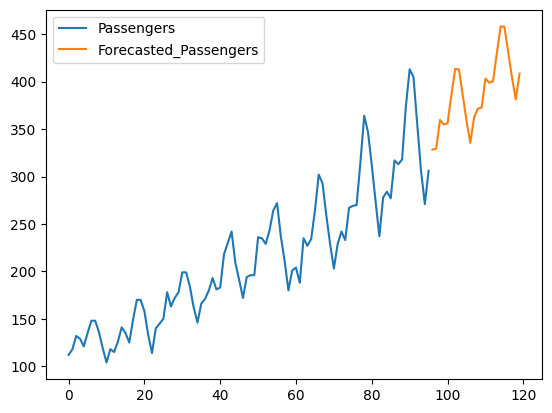

In [518]:
new_var[['Passengers','Forecasted_Passengers']].reset_index(drop=True).plot()

        The orange color plot shows the forecasted passengers of two year 2003 and 2004 and blue color shows actual passengers.
    

##### Generating Validation Data for Future Prediction

In [519]:
air.tail(5)

,Month,Passengers,t,t_squared,log_passengers,Date,month,year,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
91,Aug-02,405,92,8464,6.003887,2002-08-01,Aug,02,0,1,0,0,0,0,0,0,0,0,0,0
92,Sep-02,355,93,8649,5.872118,2002-09-01,Sep,02,0,0,0,0,0,0,0,0,0,0,0,1
93,Oct-02,306,94,8836,5.723585,2002-10-01,Oct,02,0,0,0,0,0,0,0,0,0,0,1,0
94,Nov-02,271,95,9025,5.602119,2002-11-01,Nov,02,0,0,0,0,0,0,0,0,0,1,0,0
95,Dec-02,306,96,9216,5.723585,2002-12-01,Dec,02,0,0,1,0,0,0,0,0,0,0,0,0


In [520]:
predict_data = {'Month':['Jan-03','Feb-03','Mar-03','Apr-03','May-03','Jun-03','Jul-03','Aug-03','Sep-03','Oct-03','Nov-03','Dec-03','Jan-04','Feb-04','Mar-04','Apr-04','May-04','Jun-04','Jul-04','Aug-04','Sep-04','Oct-04','Nov-04','Dec-04']}
pred_df = pd.DataFrame(predict_data)
pred_df

,Month
0,Jan-03
1,Feb-03
2,Mar-03
3,Apr-03
4,May-03
5,Jun-03
6,Jul-03
7,Aug-03
8,Sep-03
9,Oct-03


In [521]:
pred_df['t'] = range(97,97+len(pred_df))
pred_df['t_squared'] = pred_df['t']*pred_df['t']
pred_df['Date'] = pd.to_datetime(pred_df['Month'],format='%b-%y')
pred_df['month'] = air.Date.dt.strftime('%b')
pred_df['year'] = air.Date.dt.strftime('%y')
pred_df


,Month,t,t_squared,Date,month,year
0,Jan-03,97,9409,2003-01-01,Jan,95
1,Feb-03,98,9604,2003-02-01,Feb,95
2,Mar-03,99,9801,2003-03-01,Mar,95
3,Apr-03,100,10000,2003-04-01,Apr,95
4,May-03,101,10201,2003-05-01,May,95
5,Jun-03,102,10404,2003-06-01,Jun,95
6,Jul-03,103,10609,2003-07-01,Jul,95
7,Aug-03,104,10816,2003-08-01,Aug,95
8,Sep-03,105,11025,2003-09-01,Sep,95
9,Oct-03,106,11236,2003-10-01,Oct,95


In [522]:
dummy = pd.get_dummies(pred_df['month'])
pred_df = pd.concat([pred_df,dummy],axis=1)
# air.set_index('Month',inplace=True)
pred_df

,Month,t,t_squared,Date,month,year,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,Jan-03,97,9409,2003-01-01,Jan,95,0,0,0,0,1,0,0,0,0,0,0,0
1,Feb-03,98,9604,2003-02-01,Feb,95,0,0,0,1,0,0,0,0,0,0,0,0
2,Mar-03,99,9801,2003-03-01,Mar,95,0,0,0,0,0,0,0,1,0,0,0,0
3,Apr-03,100,10000,2003-04-01,Apr,95,1,0,0,0,0,0,0,0,0,0,0,0
4,May-03,101,10201,2003-05-01,May,95,0,0,0,0,0,0,0,0,1,0,0,0
5,Jun-03,102,10404,2003-06-01,Jun,95,0,0,0,0,0,0,1,0,0,0,0,0
6,Jul-03,103,10609,2003-07-01,Jul,95,0,0,0,0,0,1,0,0,0,0,0,0
7,Aug-03,104,10816,2003-08-01,Aug,95,0,1,0,0,0,0,0,0,0,0,0,0
8,Sep-03,105,11025,2003-09-01,Sep,95,0,0,0,0,0,0,0,0,0,0,0,1
9,Oct-03,106,11236,2003-10-01,Oct,95,0,0,0,0,0,0,0,0,0,0,1,0


In [523]:
pred_df.to_csv('ValidateAirline.csv',index=False)

#### CocaCola Sales - Data Driven Models

In [524]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.seasonal import seasonal_decompose

from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import Holt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [525]:
coca = pd.read_csv('CocaCola_Sales_Rawdata.csv')
coca.head()

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996


In [526]:
coca.shape

(42, 2)

<AxesSubplot: >

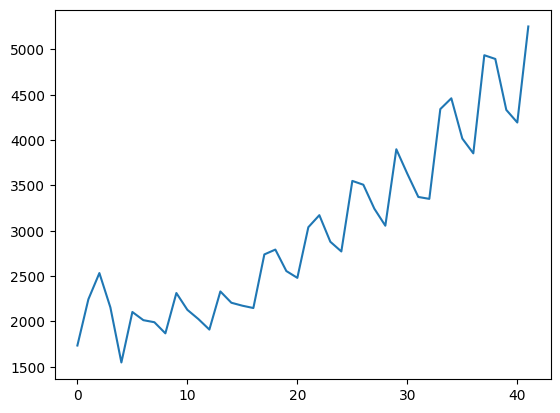

In [527]:
coca.Sales.plot()

<AxesSubplot: ylabel='Density'>

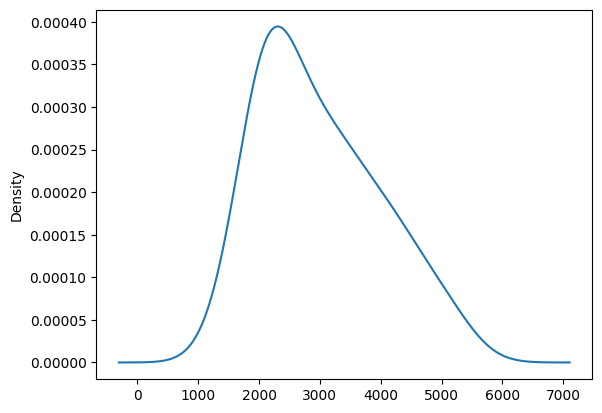

In [528]:
coca.Sales.plot(kind='kde')


In [529]:
coca.dtypes

Quarter     object
Sales      float64
dtype: object

In [530]:
# Extracting year and quarter, and creating a new column with YYYY-MM-DD format
coca['Year'] = coca['Quarter'].str.extract(r'_(\d{2})')[0]
coca['Year'] = '19' + coca['Year']
coca['Quarter'] = coca['Year'] + '-' + coca['Quarter'].str.extract(r'Q(\d+)')[0]

# Converting the "Quarter" column to datetime
coca['Quarter'] = pd.to_datetime(coca['Quarter'], format='%Y-%m')

# Sorting the DataFrame by the "Quarter" column(it is not compulsory)
coca.sort_values(by='Quarter', inplace=True)

coca

,Quarter,Sales,Year
0,1986-01-01,1734.827000,1986
1,1986-02-01,2244.960999,1986
2,1986-03-01,2533.804993,1986
3,1986-04-01,2154.962997,1986
4,1987-01-01,1547.818996,1987
5,1987-02-01,2104.411995,1987
6,1987-03-01,2014.362999,1987
7,1987-04-01,1991.746998,1987
8,1988-01-01,1869.049999,1988
9,1988-02-01,2313.631996,1988


In [531]:
coca.index.dtype

dtype('int64')

In [532]:
coca.dtypes

Quarter    datetime64[ns]
Sales             float64
Year               object
dtype: object

<AxesSubplot: xlabel='Quarter', ylabel='Sales'>

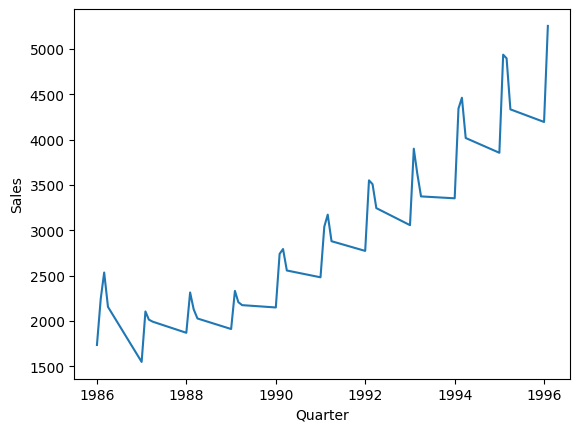

In [533]:
sns.lineplot(x='Quarter', y='Sales',data=coca)

##### Splitting data

        Train and Test split for training the model where the first 80% data are for training and remaining 20% are for testing

In [534]:
threshold = int(len(coca)*0.8)
train = coca.iloc[:threshold]
test = coca.iloc[threshold:]

In [535]:
train.index[0], test.index[-1]

(0, 41)

In [536]:
train

,Quarter,Sales,Year
0,1986-01-01,1734.827000,1986
1,1986-02-01,2244.960999,1986
2,1986-03-01,2533.804993,1986
3,1986-04-01,2154.962997,1986
4,1987-01-01,1547.818996,1987
5,1987-02-01,2104.411995,1987
6,1987-03-01,2014.362999,1987
7,1987-04-01,1991.746998,1987
8,1988-01-01,1869.049999,1988
9,1988-02-01,2313.631996,1988


In [537]:
test

,Quarter,Sales,Year
33,1994-02-01,4342.0,1994
34,1994-03-01,4461.0,1994
35,1994-04-01,4017.0,1994
36,1995-01-01,3854.0,1995
37,1995-02-01,4936.0,1995
38,1995-03-01,4895.0,1995
39,1995-04-01,4333.0,1995
40,1996-01-01,4194.0,1996
41,1996-02-01,5253.0,1996


In [538]:
threshold, train.shape, test.shape

(33, (33, 3), (9, 3))

##### Moving Average

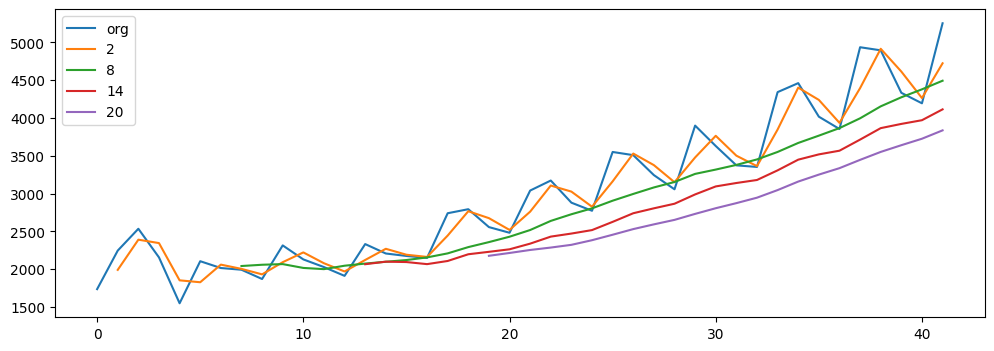

In [539]:
plt.figure(figsize=(12,4))
coca.Sales.plot(label="org")
for i in range(2,24,6):
    coca["Sales"].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')

        Here, we can see one with the step size 2 shows more accurate prediction in comparison to other which are greater then 2, which is near to the actual data

##### Time Series Decomposition plot

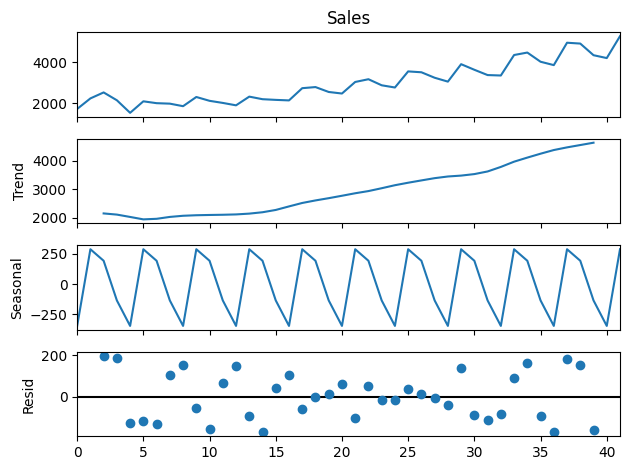

In [540]:
decompose_ts_add = seasonal_decompose(coca.Sales,period=4)
decompose_ts_add.plot()
plt.show()

        Here,we can see the trend as upward and there is seasonality which are repeating and there are noise too.

##### ACF plots and PACF plots

        ACF and PACF plots which can be used to select p and q values as well along with demonstrating its different lag versions

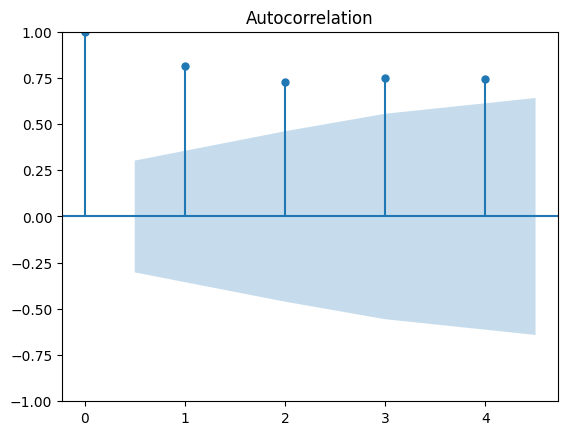

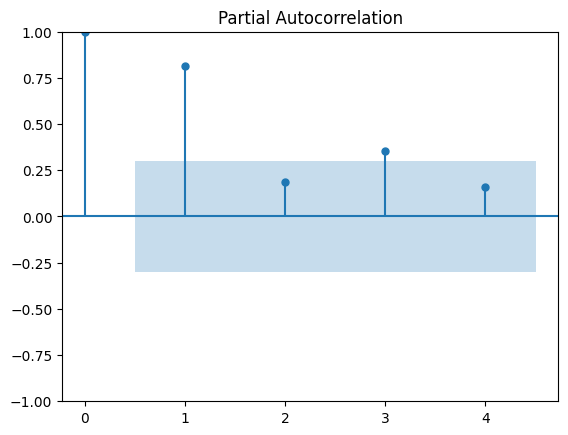

In [541]:
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(coca.Sales,lags=4)
tsa_plots.plot_pacf(coca.Sales,lags=4)
plt.show()


##### Evaluation Metric MAPE

In [542]:
def MAPE(pred,org):
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp)

##### Simple Exponential Method

In [543]:
ses_model = SimpleExpSmoothing(train["Sales"]).fit(smoothing_level=0.2)
pred_ses = ses_model.predict(start = test.index[0],end = test.index[-1])
MAPE(pred_ses,test.Sales) 


25.002287586785418

##### Holt Method

In [544]:
# Holt method 
hw_model = Holt(train["Sales"]).fit(smoothing_level=0.8, smoothing_slope=0.2)
pred_hw = hw_model.predict(start = test.index[0],end = test.index[-1])
MAPE(pred_hw,test.Sales) 

22.804732952040638

##### Holts winter exponential smoothing with additive seasonality and additive trend

In [545]:
hwe_model_add_add = ExponentialSmoothing(train["Sales"],seasonal="add",trend="add",seasonal_periods=4).fit()
pred_hwe_add_add = hwe_model_add_add.predict(start = test.index[0],end = test.index[-1])
MAPE(pred_hwe_add_add,test.Sales) 

10.960443432621751

##### Holts winter exponential smoothing with multiplicative sesonality and additive trend

In [546]:
hwe_model_mul_add = ExponentialSmoothing(train["Sales"],seasonal="mul",trend="add",seasonal_periods=4).fit() 
pred_hwe_mul_add = hwe_model_mul_add.predict(start = test.index[0],end = test.index[-1])
MAPE(pred_hwe_mul_add,test.Sales)

7.606623972928795

##### Final model by combining train and test using Multiplicative seasonality & Additive trend

In [547]:
hwe_model_mul_add = ExponentialSmoothing(coca["Sales"],seasonal="mul",trend="add",seasonal_periods=4).fit()

In [548]:
pred = hwe_model_mul_add.forecast(20)
pred

42    5210.843582
43    4776.518484
44    4519.149138
45    5689.930009
46    5630.325889
47    5153.450902
48    4868.872128
49    6121.898929
50    6049.808195
51    5530.383320
52    5218.595118
53    6553.867849
54    6469.290501
55    5907.315737
56    5568.318108
57    6985.836768
58    6888.772807
59    6284.248155
60    5918.041099
61    7417.805688
dtype: float64

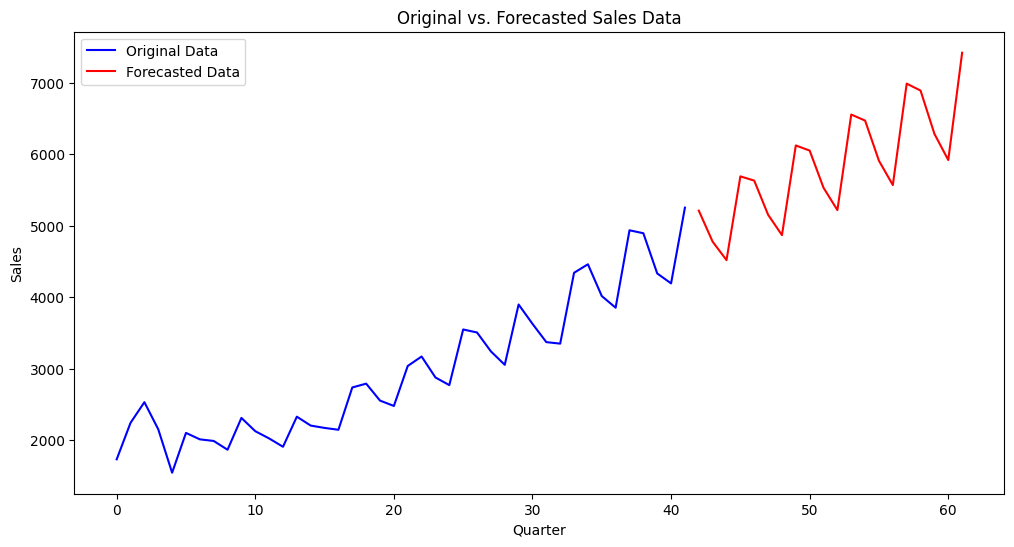

In [549]:
# Here, 'coca' contains the original data and 'pred' contains the forecasted values
original_data = coca['Sales']
forecasted_data = pred

# Plotting original data in blue and forecasted data in red
plt.figure(figsize=(12, 6))
plt.plot(original_data.index, original_data, label='Original Data', color='blue')
plt.plot(pred.index, forecasted_data, label='Forecasted Data', color='red')
plt.xlabel('Quarter')
plt.ylabel('Sales')
plt.legend()
plt.title('Original vs. Forecasted Sales Data')
plt.show()


        Here, we can see upward trend and seasonality in the data.

#### ARIMA Model on CocaCola Sales Data

In [551]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse

ADF Statistic: 1.3094210180613535
p-value: 0.9966611674081021


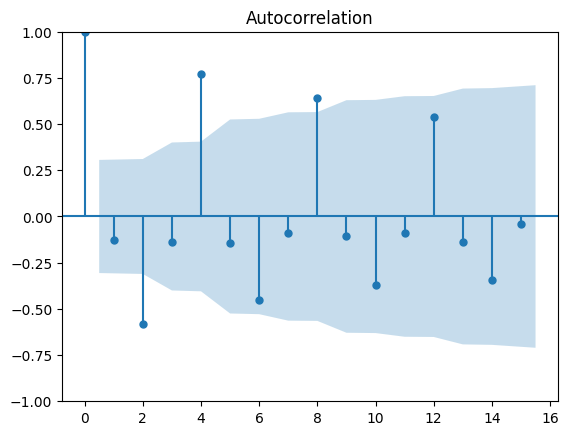

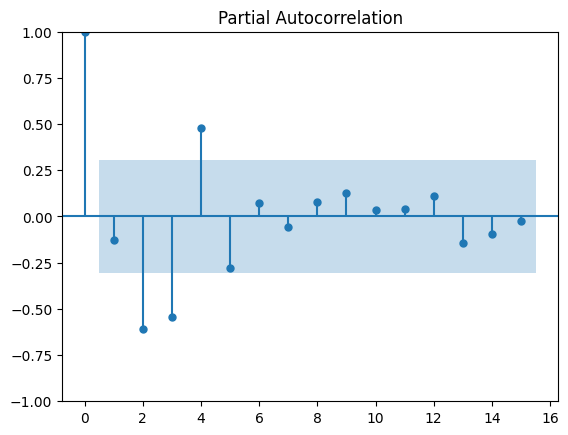

In [552]:
data = coca.copy()
data['Quarter'] = pd.to_datetime(data['Quarter'])
# data.set_index('Quarter', inplace=True)

# Checking for stationarity using Augmented Dickey-Fuller Test
result = adfuller(data['Sales'])
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

# In case of not stationary,taking first differences to make it stationary
if result[1] > 0.05:
    data['Sales_diff'] = data['Sales'] - data['Sales'].shift(1)
    data.dropna(inplace=True)
else:
    data['Sales_diff'] = data['Sales']

# Plotting ACF and PACF to determine p and q for ARIMA
plot_acf(data['Sales_diff'], lags=15)
plot_pacf(data['Sales_diff'], lags=15)
plt.show()

In [553]:
# Fitting ARIMA model
p = 3  # value from PACF plot
d = 2  # 1st order differencing
q = 4  # value from ACF plot

model = ARIMA(data['Sales'], order=(p, d, q))
results = model.fit()

# Forecasting future values
forecast_steps = 20  # number of periods we want to forecast
forecast = results.get_forecast(steps=forecast_steps)

# Calculating confidence intervals
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()
forecast


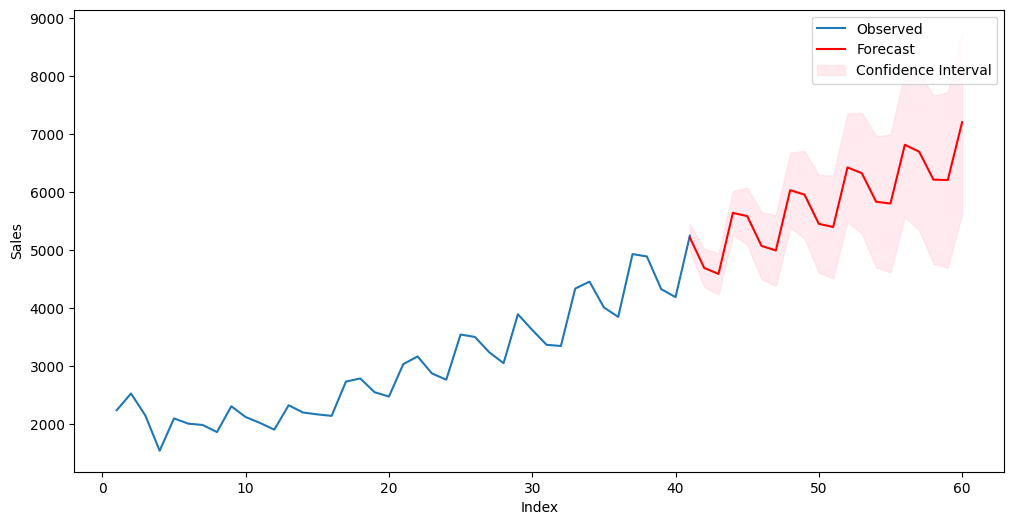

In [554]:
# Plotting original data and forecasted data
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Sales'], label='Observed')
plt.plot(forecast_mean.index, forecast_mean.values, color='red', label='Forecast')
plt.fill_between(forecast_ci.index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='pink', alpha=0.3, label='Confidence Interval')
plt.xlabel('Index')
plt.ylabel('Sales')
plt.legend()
plt.show()

In [555]:
# Calculating RMSE for the forecast
actual_values = data['Sales'][-forecast_steps:]
rmse_value = rmse(forecast_mean, actual_values)
print(f'RMSE: {rmse_value:.2f}')

RMSE: 1980.88
